<a href="https://colab.research.google.com/github/Lochan9/IPL_viazualiation/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML,display
data=pd.read_csv('Most Runs All Seasons Combine.csv',index_col=[0])

In [14]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,Shaun Marsh,11,11,2,616,115,68.44,441,139.68,1,5,59,26
1,Gautam Gambhir,14,14,1,534,86,41.07,379,140.89,0,5,68,8
2,Sanath Jayasuriya,14,14,2,518,114*,43.16,309,167.63,1,2,58,31
3,Shane Watson,15,15,5,472,76*,47.20,311,151.76,0,4,47,19
4,Graeme Smith,11,11,2,441,91,49.00,362,121.82,0,3,54,8


In [15]:
rows,columns=data.shape[0],data.shape[1]
text="<h3 ><b style=' color:#000080'>Inference:</b>The dataframe contains "+f"{rows} rows and {columns} columns."+"</h3>"
display(HTML(text))

In [16]:
data.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [17]:
data['Player'].value_counts()

Shikhar Dhawan       15
Virat Kohli          14
Wriddhiman Saha      14
Manish Pandey        14
MS Dhoni             14
                     ..
Lee Carseldine        1
Rob Quiney            1
Marchant de Lange     1
Abdur Razzak          1
Anuj Rawat            1
Name: Player, Length: 545, dtype: int64

In [18]:
data.loc[data['Player']=='Shikhar Dhawan']

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
13,Shikhar Dhawan,14,14,5,340,68*,37.77,295,115.25,0,4,35,8
218,Shikhar Dhawan,5,4,0,40,22,10.00,45,88.88,0,0,3,0
219,Shikhar Dhawan,5,4,0,40,22,10.00,45,88.88,0,0,3,0
321,Shikhar Dhawan,10,10,0,191,56,19.10,170,112.35,0,2,23,3
442,Shikhar Dhawan,14,14,2,400,95*,33.33,310,129.03,0,2,47,7
584,Shikhar Dhawan,15,15,1,569,84,40.64,439,129.61,0,5,58,18
754,Shikhar Dhawan,10,10,2,311,73*,38.87,253,122.92,0,3,37,5
895,Shikhar Dhawan,14,14,1,377,64*,29.00,319,118.18,0,2,49,7
1031,Shikhar Dhawan,14,14,1,353,54,27.15,286,123.42,0,3,45,6
1146,Shikhar Dhawan,17,17,4,501,82*,38.53,429,116.78,0,4,51,8


In [19]:
data[data.duplicated()]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
219,Shikhar Dhawan,5,4,0,40,22,10.0,45,88.88,0,0,3,0
240,Ishant Sharma,11,3,1,16,9,8.0,13,123.07,0,0,1,1


In [20]:
data.drop_duplicates(inplace=True)

In [21]:
rows,columns=data.shape[0],data.shape[1]
text="<h3 ><b style=' color:#000080'>Inference:</b>The dataframe contains "+f"{rows} rows and {columns} columns."+"</h3>"
display(HTML(text))

In [22]:
no_of_seasons=data['Player'].value_counts().reset_index()
no_of_seasons.columns=['Player','No. of Seasons Played']
no_of_seasons.sort_values('Player',inplace=True)
no_of_seasons.reset_index(inplace=True)

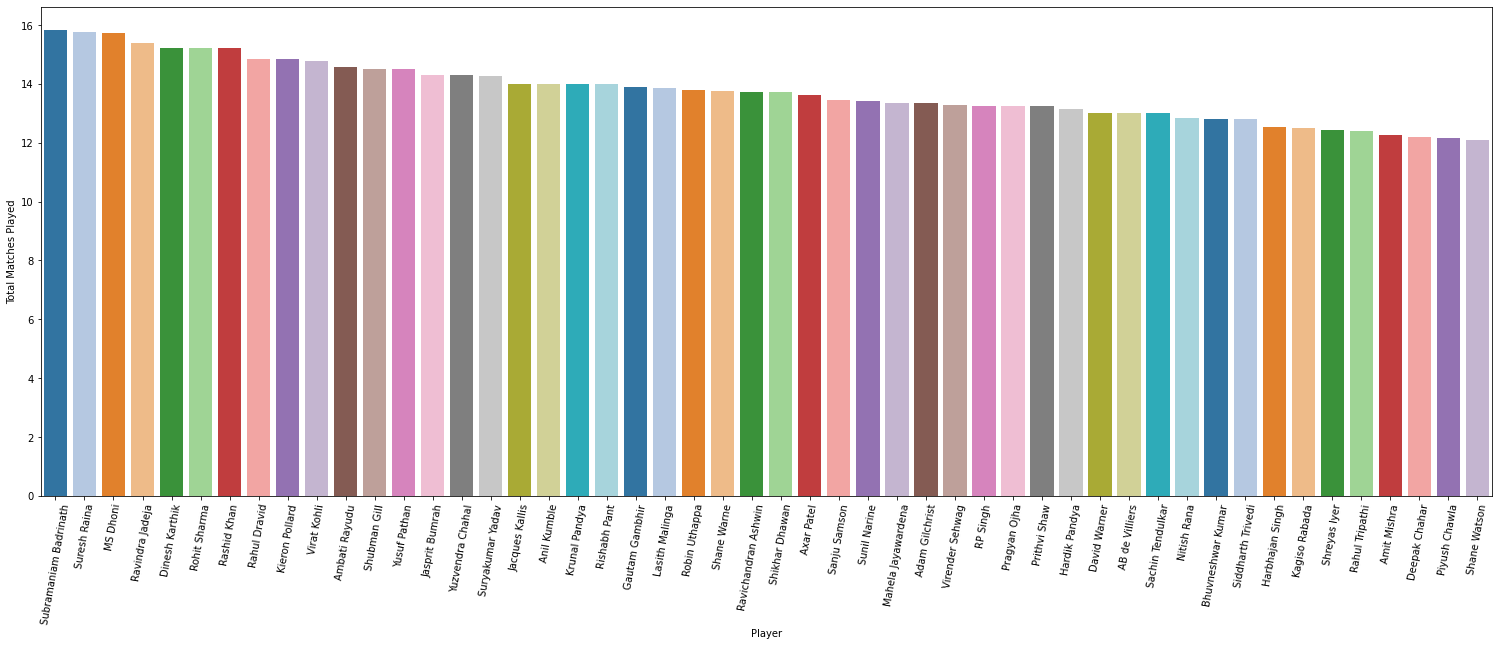

In [23]:
matches_m=data.groupby('Player')['Mat'].mean().reset_index()
matches_m.columns=['Player','Total Matches Played']

temp=matches_m.loc[no_of_seasons['No. of Seasons Played']>=3]
contenders=temp.shape[0]
temp=temp.sort_values('Total Matches Played',ascending=False)[:50]
plt.figure(figsize=(26,9))
sns.barplot(data=temp,x='Player',y='Total Matches Played',palette='tab20')
plt.xticks(rotation=80);
plt.show()
text="<h3 style='text-align:center'><b style='color:#000080'>"+f"Total Number of Players that satisfied this criterion :</b><b style='color:#FF00FF'>{contenders}</b></h3>"
display(HTML(text))

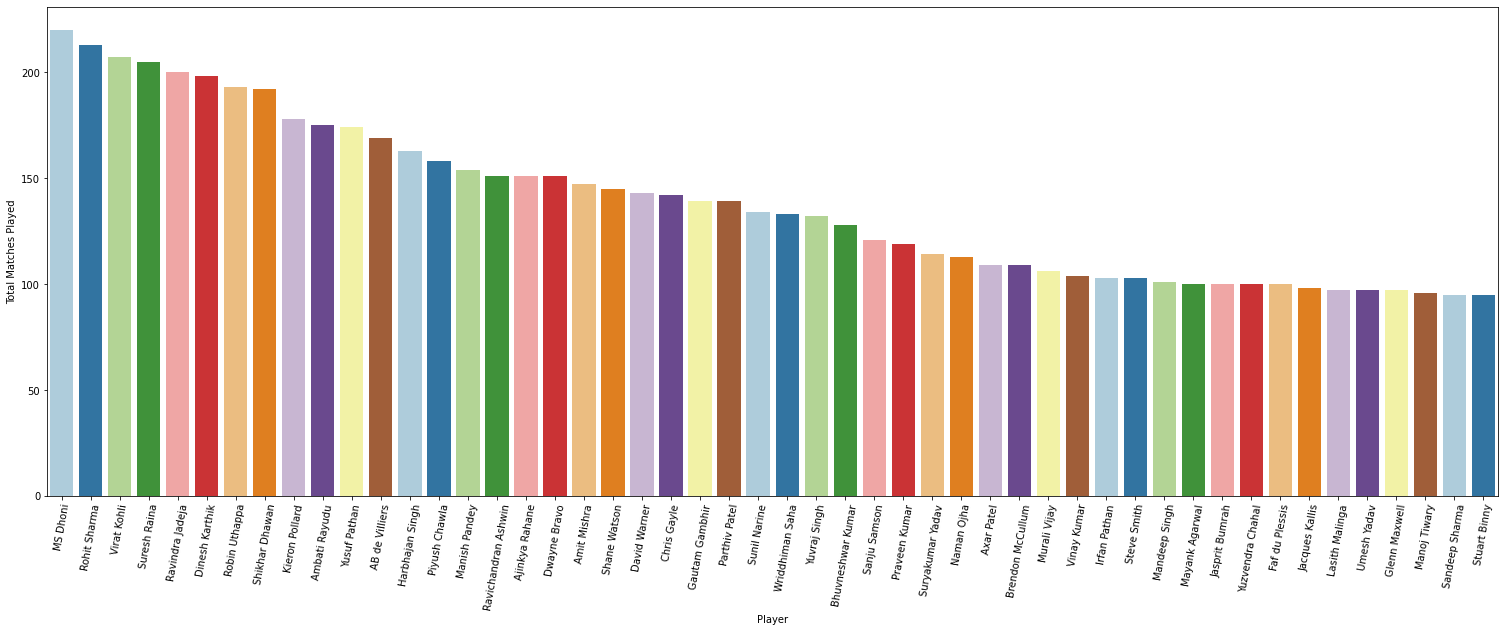

In [26]:
matches=data.groupby('Player')['Mat'].sum().reset_index()
matches.columns=['Player','Total Matches Played']

temp=matches.sort_values('Total Matches Played',ascending=False)[:50]
plt.figure(figsize=(26,9))
sns.barplot(data=temp,x='Player',y='Total Matches Played',palette='Paired')
plt.xticks(rotation=80);